In [ ]:
!rm -R sample_data/
!pip install kaggle

In [4]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

/
Mounted at /content/gdrive
'Biwak miejsca.gmap'   data_for_train	       'Google Earth'   Passwords.kdbx
'Colab Notebooks'     'Forgotten places.gmap'  'My Drive'


In [ ]:
!cp /mydrive/data_for_train/kaggle.json /content/

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

In [ ]:
%cd /content/
!kaggle datasets download -d aadityasinghal/facial-expression-dataset

/content
 89% 54.0M/60.7M [00:01<00:00, 19.6MB/s]
100% 60.7M/60.7M [00:01<00:00, 35.7MB/s]


In [ ]:
!unzip /content/facial-expression-dataset.zip -d /content/data
!rm -R /content/facial-expression-dataset.zip

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: /content/data/train/train/sad/Training_65242339.jpg  
  inflating: /content/data/train/train/sad/Training_65267116.jpg  
  inflating: /content/data/train/train/sad/Training_65275626.jpg  
  inflating: /content/data/train/train/sad/Training_6529266.jpg  
  inflating: /content/data/train/train/sad/Training_65329617.jpg  
  inflating: /content/data/train/train/sad/Training_65338712.jpg  
  inflating: /content/data/train/train/sad/Training_65338797.jpg  
  inflating: /content/data/train/train/sad/Training_65387162.jpg  
  inflating: /content/data/train/train/sad/Training_65404494.jpg  
  inflating: /content/data/train/train/sad/Training_65426218.jpg  
  inflating: /content/data/train/train/sad/Training_65430136.jpg  
  inflating: /content/data/train/train/sad/Training_65437377.jpg  
  inflating: /content/data/train/train/sad/Training_6545735.jpg  
  inflating: /content/data/train/train/sad/Training_65463385.jpg  

In [1]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def inputPrepare(img_x):
  img_x = cv2.resize(img_x, (48, 48))
  return img_x/255

In [ ]:
emotion = {
  0: "sad",
  1: "disgust",
  2: "surprise",
  3: "fear",
  4: "neutral",
  5: "angry",
  6: "happy"
}

In [ ]:
train_x = []
train_y = []
for index, fileset in enumerate(os.listdir("/content/data/train/train")):
  output = np.zeros(7)
  output[index] = 1
  for filename in os.listdir(f"/content/data/train/train/{fileset}"):
    img = cv2.imread(f"/content/data/train/train/{fileset}/{filename}")
    # img = inputPrepare(img)
    train_x.append(img)
    train_y.append(output)

In [ ]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)

In [ ]:
from sklearn.utils import shuffle

In [ ]:
train_x_test, train_y_test = shuffle(train_x, train_y, random_state=0)

(48, 48, 3)
[1. 0. 0. 0. 0. 0. 0.]
sad


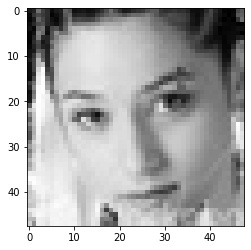

In [ ]:
num = 12
print(train_x[num,:,:,:].shape)
print(train_y[num,:])
print(emotion[np.where(train_y[num,:] == 1)[0][0]])
plt.imshow(train_x[num,:,:,:])

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Dense(7, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model_history = model.fit(x=train_x, y=train_y, epochs=200, verbose=1)

Epoch 1/200
898/898 [==============================] - 52s 24ms/step - loss: 0.3930 - acc: 0.2434
Epoch 2/200
898/898 [==============================] - 21s 23ms/step - loss: 0.3896 - acc: 0.2509
Epoch 3/200
898/898 [==============================] - 21s 23ms/step - loss: 0.3892 - acc: 0.2507
Epoch 4/200
898/898 [==============================] - 21s 24ms/step - loss: 0.3892 - acc: 0.2513
Epoch 5/200
898/898 [==============================] - 21s 24ms/step - loss: 0.3889 - acc: 0.2513
Epoch 6/200
898/898 [==============================] - 21s 23ms/step - loss: 0.3889 - acc: 0.2513
Epoch 7/200
898/898 [==============================] - 21s 24ms/step - loss: 0.3888 - acc: 0.2526
Epoch 8/200
898/898 [==============================] - 21s 24ms/step - loss: 0.3872 - acc: 0.2557
Epoch 9/200
898/898 [==============================] - 21s 24ms/step - loss: 0.3799 - acc: 0.2788
Epoch 10/200
898/898 [==============================] - 21s 23ms/step - loss: 0.3598 - acc: 0.3440
Epoch 11/200
898/89

In [ ]:
model.save('/mydrive/data_for_train/social_robot/my_model.h5')

In [ ]:
!ls

data  gdrive  kaggle.json  my_model.h5


In [ ]:
model.save('/mydrive/data_for_train/kaggle.json')

In [ ]:
!ls /mydrive/data_for_train/social_robot

my_model.h5


In [ ]:
!mkdir /mydrive/data_for_train/social_robot

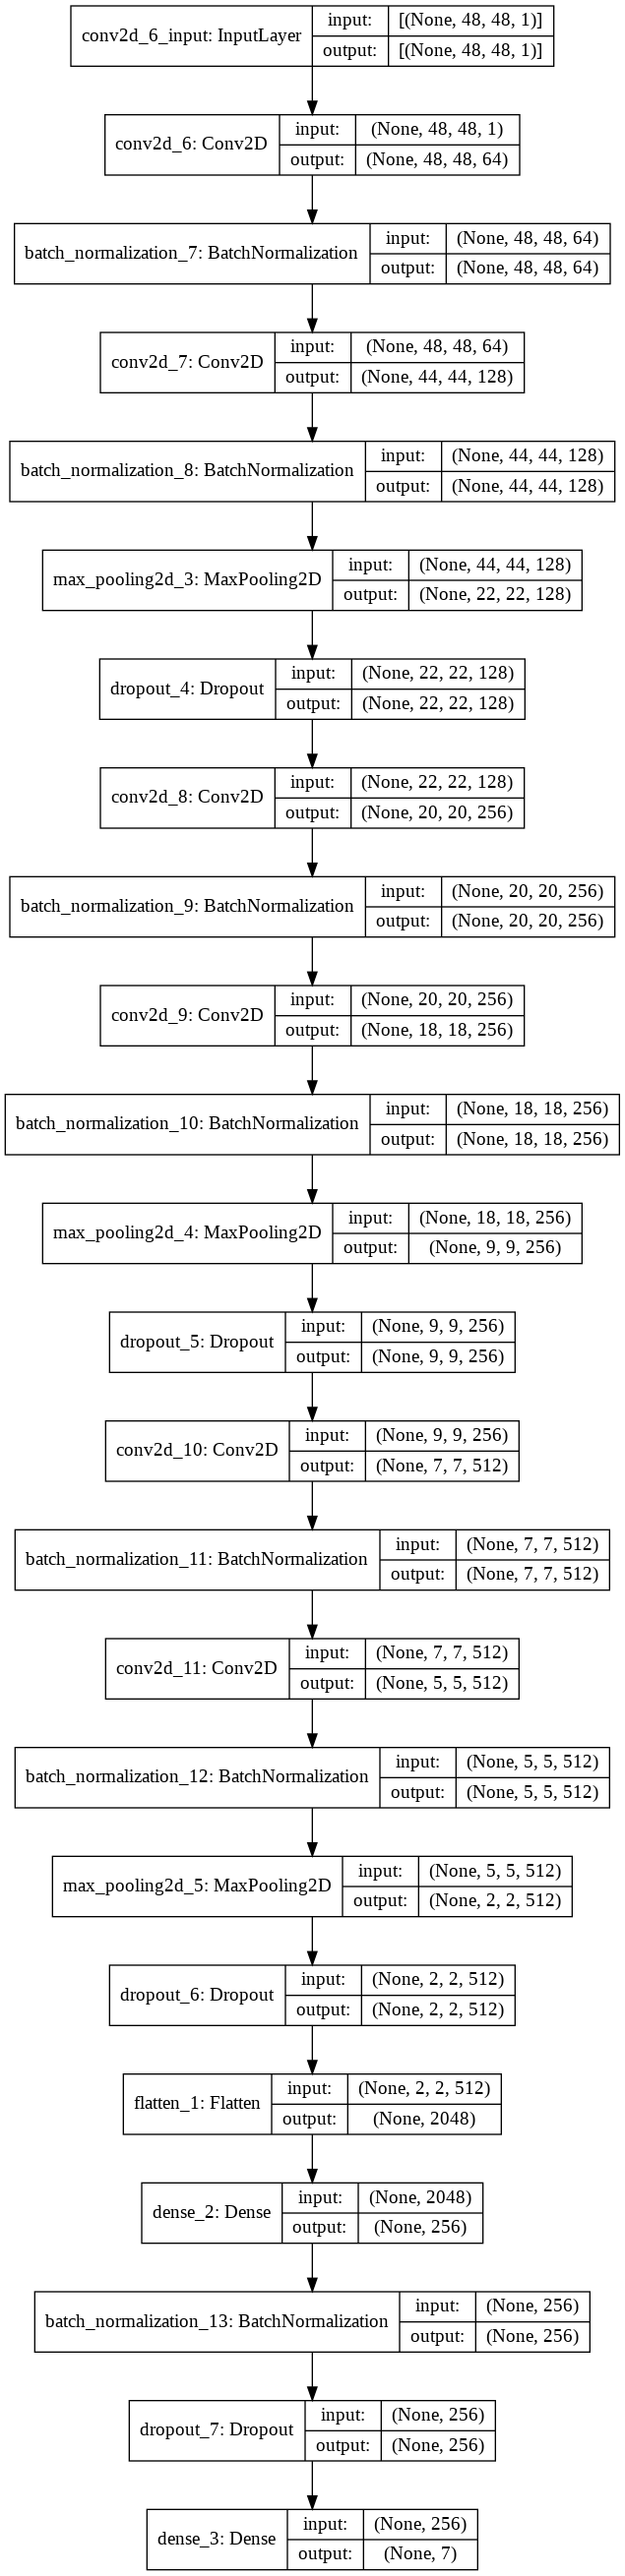

In [7]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [5]:
!ls /mydrive/data_for_train/social_robot/

emotion_model_0.h5  fer2013.csv.zip


In [6]:
model = tf.keras.models.load_model('/mydrive/data_for_train/social_robot/emotion_model_0.h5')